In [47]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



#### Reading the Dataset

In [2]:
df = pd.read_csv('ict.csv')

In [3]:
# Viewing the Dataset
df.head()

,Timestamp,Name,Age,Occupation,Gender,Education status,Marital status,Technology supported teaching makes learning more effective.,The use of instructional technologies increases the interest of students toward courses.,Technology makes effective use of class time.,...,Insufficiency of financial resources for technology integration,Black board,Computer projector system,"Printed materials(books, journals)",Teacher’s view ICT as a narrow approach in implementation in classrooms.,Teachers perceived their role to get inferior if ICT is implemented in classrooms.,Relationship between teacher and student will change because of use of ICT.,I know computers and its functions,I repair my own computer,I install software on my own
0,2022/01/12 11:49:38 AM GMT+5:30,Vijayasarathy E J,20 - 29 years,Student,Male,UG degree,Unmarried,Agree,Agree,Disagree,...,Agree,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Disagree,Strongly agree,Agree,Disagree,Neither agree nor disagree
1,2022/01/12 11:55:54 AM GMT+5:30,Venkat Rahul,20 - 29 years,Working professional,Male,UG degree,Unmarried,Agree,Agree,NaN,...,Agree,Agree,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Disagree,Agree
2,2022/01/12 11:57:41 AM GMT+5:30,TAMILARASAN D,20 - 29 years,Working professional,Male,UG degree,Unmarried,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Strongly agree,Strongly agree
3,2022/01/12 11:59:07 AM GMT+5:30,Ariknesh,20 - 29 years,Working professional,Male,UG degree,Unmarried,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,...,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree,Agree,Disagree,Disagree
4,2022/01/12 11:59:43 AM GMT+5:30,Keerthivasan P,20 - 29 years,Student,Male,PG degree,Unmarried,Agree,Agree,Agree,...,Agree,Agree,Disagree,Agree,Agree,Agree,Strongly agree,Agree,Disagree,Agree


In [4]:
df.shape

(200, 22)

In [8]:
# Checking for NaN Values
df.isnull().values.any()

True

In [9]:
df.isnull().sum().sum()

3

In [10]:
#Dropping the NaN Values
df.dropna()

,Timestamp,Name,Age,Occupation,Gender,Education status,Marital status,Technology supported teaching makes learning more effective.,The use of instructional technologies increases the interest of students toward courses.,Technology makes effective use of class time.,...,Insufficiency of financial resources for technology integration,Black board,Computer projector system,"Printed materials(books, journals)",Teacher’s view ICT as a narrow approach in implementation in classrooms.,Teachers perceived their role to get inferior if ICT is implemented in classrooms.,Relationship between teacher and student will change because of use of ICT.,I know computers and its functions,I repair my own computer,I install software on my own
0,2022/01/12 11:49:38 AM GMT+5:30,Vijayasarathy E J,20 - 29 years,Student,Male,UG degree,Unmarried,Agree,Agree,Disagree,...,Agree,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Disagree,Strongly agree,Agree,Disagree,Neither agree nor disagree
2,2022/01/12 11:57:41 AM GMT+5:30,TAMILARASAN D,20 - 29 years,Working professional,Male,UG degree,Unmarried,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Strongly agree,Strongly agree
3,2022/01/12 11:59:07 AM GMT+5:30,Ariknesh,20 - 29 years,Working professional,Male,UG degree,Unmarried,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,...,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree,Agree,Disagree,Disagree
4,2022/01/12 11:59:43 AM GMT+5:30,Keerthivasan P,20 - 29 years,Student,Male,PG degree,Unmarried,Agree,Agree,Agree,...,Agree,Agree,Disagree,Agree,Agree,Agree,Strongly agree,Agree,Disagree,Agree
5,2022/01/12 12:08:50 PM GMT+5:30,RANJITHAM S,Below-20years,Student,Female,UG degree,Unmarried,Strongly agree,Agree,Strongly agree,...,Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2022/01/15 1:27:31 PM GMT+5:30,Dharuna,20 - 29 years,Working professional,Male,PG degree,Unmarried,Strongly disagree,Strongly disagree,Neither agree nor disagree,...,Strongly disagree,Strongly disagree,Strongly disagree,Neither agree nor disagree,Strongly agree,Agree,Disagree,Neither agree nor disagree,Strongly disagree,Strongly agree
196,2022/01/15 1:27:41 PM GMT+5:30,Satyendra,20 - 29 years,Working professional,Male,PG degree,Married,Strongly agree,Disagree,Disagree,...,Disagree,Neither agree nor disagree,Disagree,Strongly agree,Strongly disagree,Neither agree nor disagree,Disagree,Disagree,Strongly disagree,Strongly agree
197,2022/01/15 1:27:51 PM GMT+5:30,Nirved,Below-20years,Homemaker,Male,PG degree,Unmarried,Strongly agree,Agree,Disagree,...,Neither agree nor disagree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree
198,2022/01/15 1:28:36 PM GMT+5:30,Navendu,20 - 29 years,Other,Male,PG degree,Married,Strongly disagree,Strongly disagree,Strongly agree,...,Disagree,Agree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly disagree,Disagree,Agree,Strongly agree,Strongly disagree


In [16]:
df.drop('Timestamp', inplace=True, axis=1)

In [21]:
#Types of variables 
df.dtypes

Name                                                                                        object
Age                                                                                         object
Occupation                                                                                  object
Gender                                                                                      object
Education status                                                                            object
Marital status                                                                              object
Technology supported teaching makes learning more effective.                                object
The use of instructional technologies increases the interest of students toward courses.    object
Technology makes effective use of class time.                                               object
Poor technical and physical infrastructure of learning environments.                        object
 Inefficie

In [24]:
#Creating Replacer function to turn the objects into integer values
replacer = {'Strongly disagree':1, 'Disagree':2, 'Neither agree nor disagree':3, 'Agree':4, 'Strongly agree':5}
cols = df.columns[df.dtypes == 'object']
df[cols] = df[cols].replace(replacer)


In [25]:
#Viewing the Dataset
df.head()

,Name,Age,Occupation,Gender,Education status,Marital status,Technology supported teaching makes learning more effective.,The use of instructional technologies increases the interest of students toward courses.,Technology makes effective use of class time.,Poor technical and physical infrastructure of learning environments.,...,Insufficiency of financial resources for technology integration,Black board,Computer projector system,"Printed materials(books, journals)",Teacher’s view ICT as a narrow approach in implementation in classrooms.,Teachers perceived their role to get inferior if ICT is implemented in classrooms.,Relationship between teacher and student will change because of use of ICT.,I know computers and its functions,I repair my own computer,I install software on my own
0,Vijayasarathy E J,20 - 29 years,Student,Male,UG degree,Unmarried,4,4,2.0,4,...,4,4,3,4,3,2,5.0,4.0,2,3
1,Venkat Rahul,20 - 29 years,Working professional,Male,UG degree,Unmarried,4,4,NaN,4,...,4,4,5,5,4,3,3.0,5.0,2,4
2,TAMILARASAN D,20 - 29 years,Working professional,Male,UG degree,Unmarried,4,4,4.0,5,...,4,4,4,4,4,3,3.0,5.0,5,5
3,Ariknesh,20 - 29 years,Working professional,Male,UG degree,Unmarried,3,3,3.0,3,...,4,4,3,2,3,4,4.0,4.0,2,2
4,Keerthivasan P,20 - 29 years,Student,Male,PG degree,Unmarried,4,4,4.0,4,...,4,4,2,4,4,4,5.0,4.0,2,4


In [26]:
#Types of Data
df.dtypes

Name                                                                                         object
Age                                                                                          object
Occupation                                                                                   object
Gender                                                                                       object
Education status                                                                             object
Marital status                                                                               object
Technology supported teaching makes learning more effective.                                  int64
The use of instructional technologies increases the interest of students toward courses.      int64
Technology makes effective use of class time.                                               float64
Poor technical and physical infrastructure of learning environments.                          int64


### Mean and Standard Deviation for the factors

In [30]:
df.describe()

,Technology supported teaching makes learning more effective.,The use of instructional technologies increases the interest of students toward courses.,Technology makes effective use of class time.,Poor technical and physical infrastructure of learning environments.,Inefficiency of guidance and support by administration.,Insufficiency of financial resources for technology integration,Black board,Computer projector system,Teacher’s view ICT as a narrow approach in implementation in classrooms.,Teachers perceived their role to get inferior if ICT is implemented in classrooms.,Relationship between teacher and student will change because of use of ICT.,I know computers and its functions,I repair my own computer,I install software on my own
count,200.00000,200.000000,199.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,199.000000,199.000000,200.000000,200.000000
mean,3.24000,3.130000,3.130653,3.195000,3.145000,3.080000,3.185000,3.060000,3.100000,3.285000,2.974874,3.266332,3.165000,3.180000
std,1.31951,1.308304,1.397333,1.305949,1.422707,1.346352,1.396613,1.343662,1.378223,1.304717,1.379640,1.323609,1.465782,1.391864
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.00000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Median of all factors dependent to ICT

In [31]:
df.median()

C:\Users\elysi\AppData\Local\Temp/ipykernel_12372/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Technology supported teaching makes learning more effective.                                4.0
The use of instructional technologies increases the interest of students toward courses.    3.0
Technology makes effective use of class time.                                               3.0
Poor technical and physical infrastructure of learning environments.                        3.0
 Inefficiency of guidance and support by administration.                                    3.0
 Insufficiency of financial resources for technology integration                            3.0
Black board                                                                                 4.0
Computer projector system                                                                   3.0
Teacher’s view ICT as a narrow approach in implementation in classrooms.                    3.0
Teachers perceived their role to get inferior if ICT is implemented in classrooms.          3.0
Relationship between teacher and student

### Correlation Analysis Between Different Factors

In [57]:
corr = df.corr()
corr

,Technology supported teaching makes learning more effective.,The use of instructional technologies increases the interest of students toward courses.,Technology makes effective use of class time.,Poor technical and physical infrastructure of learning environments.,Inefficiency of guidance and support by administration.,Insufficiency of financial resources for technology integration,Black board,Computer projector system,Teacher’s view ICT as a narrow approach in implementation in classrooms.,Teachers perceived their role to get inferior if ICT is implemented in classrooms.,Relationship between teacher and student will change because of use of ICT.,I know computers and its functions,I repair my own computer,I install software on my own
Technology supported teaching makes learning more effective.,1.000000,0.200153,0.147283,0.025195,0.045613,0.255029,0.101220,0.110877,0.135950,-0.042849,0.172220,0.076452,-0.002390,0.118639
The use of instructional technologies increases the interest of students toward courses.,0.200153,1.000000,0.065476,0.123321,0.092412,-0.014493,0.030775,0.041278,0.031770,-0.169009,0.149846,0.112902,-0.139642,-0.087423
Technology makes effective use of class time.,0.147283,0.065476,1.000000,0.091287,0.109933,0.101985,-0.004401,0.018055,0.182047,-0.004000,0.006859,0.190970,0.077745,0.063328
Poor technical and physical infrastructure of learning environments.,0.025195,0.123321,0.091287,1.000000,0.155096,-0.071793,0.079307,-0.035338,-0.047183,-0.009187,-0.014037,0.037572,0.051361,-0.047053
Inefficiency of guidance and support by administration.,0.045613,0.092412,0.109933,0.155096,1.000000,0.119839,0.183697,0.037485,-0.020246,-0.022375,-0.039494,0.190251,0.036664,-0.094452
Insufficiency of financial resources for technology integration,0.255029,-0.014493,0.101985,-0.071793,0.119839,1.000000,0.093643,0.089000,0.133781,-0.058816,0.017316,0.178324,0.034019,-0.064036
Black board,0.101220,0.030775,-0.004401,0.079307,0.183697,0.093643,1.000000,0.125268,0.131317,-0.026323,0.057451,0.152388,0.061110,0.140473
Computer projector system,0.110877,0.041278,0.018055,-0.035338,0.037485,0.089000,0.125268,1.000000,0.034733,0.099121,0.079660,0.144843,0.000051,0.085553
Teacher’s view ICT as a narrow approach in implementation in classrooms.,0.135950,0.031770,0.182047,-0.047183,-0.020246,0.133781,0.131317,0.034733,1.000000,-0.021518,0.088792,0.157415,-0.018159,0.053439
Teachers perceived their role to get inferior if ICT is implemented in classrooms.,-0.042849,-0.169009,-0.004000,-0.009187,-0.022375,-0.058816,-0.026323,0.099121,-0.021518,1.000000,-0.049525,-0.055219,0.111923,-0.089268


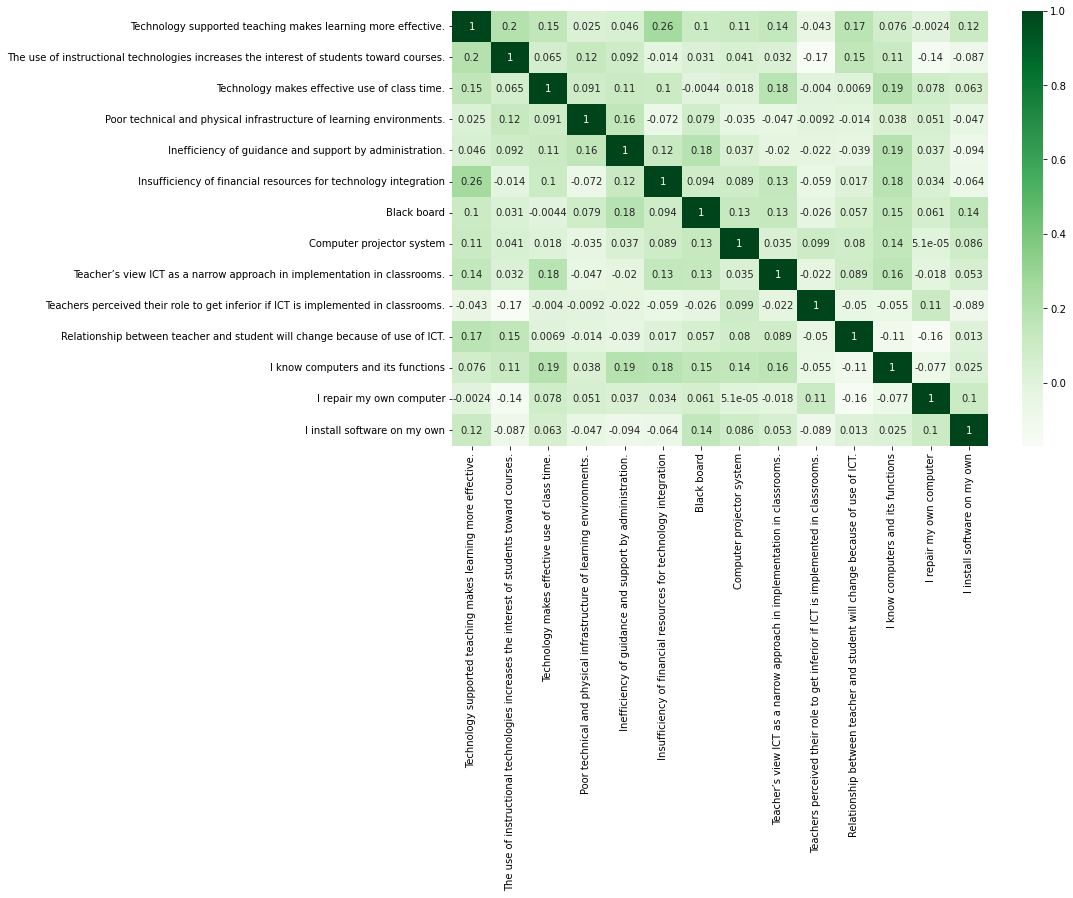

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.savefig('IctCorrelation.png')